![](images/pagerank_paper.png)

In [1]:
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame([
    ['D', 'B'],
    ['D', 'A'],
    ['B', 'C'],
    ['C', 'B'],
    ['F', 'B'],
    ['F', 'E'],
    ['E', 'F'],
    ['E', 'B'], 
    ['E', 'D'],
    ['G', 'B'],
    ['G', 'E'],
    ['H', 'B'],
    ['H', 'E'],
    ['I', 'B'],
    ['I', 'E'],
    ['J', 'E'],
    ['K', 'E']
], columns=['from', 'to'])

In [3]:
G = nx.from_pandas_edgelist(
        df, 
        source='from', 
        target='to', 
        create_using=nx.DiGraph
)

In [4]:
RANDOM_SEED = 200000
np.random.seed(RANDOM_SEED)
pos = nx.spring_layout(G)

In [5]:
def node_sizer(G, mode='normal', max_node_size=2000):
    
    nodes = len(G.nodes())

    if mode == 'normal':
        nodelist = list(G.nodes())
        node_size = nodes * [max_node_size]
    
    elif mode == 'indegree':
        in_degree = dict(G.in_degree)
        nodelist = list(in_degree.keys())
        multiplier = max_node_size / (max(in_degree.values()))
        node_size = [s * multiplier for s in in_degree.values()]

    elif mode == 'pagerank':
        pagerank = nx.pagerank(G, alpha=0.85)
        nodelist = list(pagerank.keys())
        multiplier = max_node_size / (max(pagerank.values()))
        node_size = [s * multiplier for s in pagerank.values()]
    
    else:
        raise NotImplementedError(f'Sorry, but "{mode}" isn\'t a thing')
    
    return nodelist, node_size


In [6]:
def draw_graph(G, pos, nodelist, node_size, node_color='green'):
    plt.figure(figsize=(10, 8))
    nx.draw_networkx(
        G, pos=pos, node_color=node_color, 
        nodelist=nodelist, node_size=node_size)
    plt.xticks([])
    plt.yticks([])

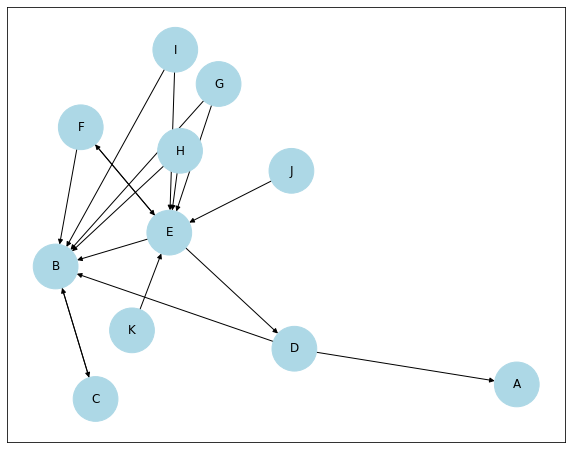

In [7]:
nodelist, node_size = node_sizer(G)
draw_graph(G, pos, nodelist, node_size, node_color='lightblue')

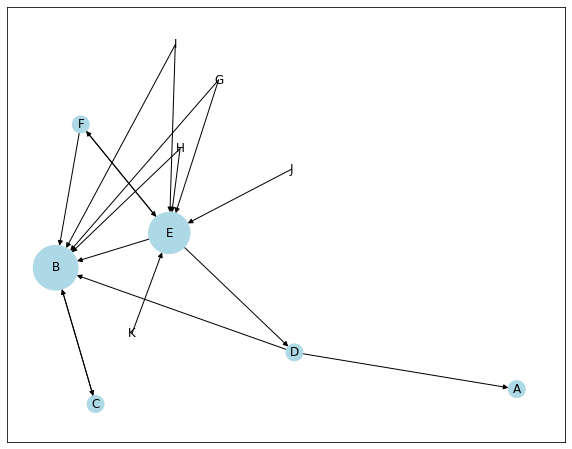

In [8]:
nodelist, node_size = node_sizer(G, mode='indegree')
draw_graph(G, pos, nodelist, node_size, node_color='lightblue')

PageRank considers the number and **quality** of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that **more important** websites are likely to receive more links from other **important** websites.

$$PR(p_i) = \frac{1-d}{N} + d \sum_{p_j \in M(p_i)} \frac{PR (p_j)}{L(p_j)}$$


- ${\displaystyle p_{1},p_{2},...,p_{N}}$ are the pages under consideration, 
- ${\displaystyle M(p_{i})}$ is the set of pages that link to ${\displaystyle p_{i}}$, 
- ${\displaystyle L(p_{j})}$ is the number of outbound links on page ${\displaystyle p_{j}}$, and 
- ${\displaystyle N}$ is the total number of pages.

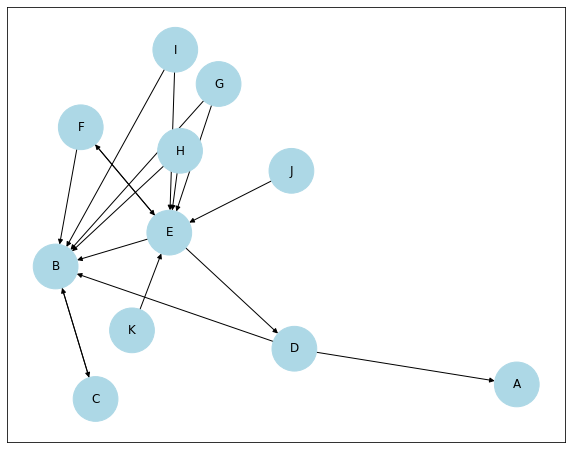

In [9]:
nodelist, node_size = node_sizer(G)
draw_graph(G, pos, nodelist, node_size, node_color='lightblue')

In [10]:
import random
random.seed(1993)

nodes = list(G.nodes())
print('Nodes:', nodes)

node = random.choice(nodes)
print('Random node:', node)

neighbors = list(G.neighbors(node))
print(f'Neighbors of node {node}: {neighbors}')

Nodes: ['D', 'B', 'A', 'C', 'F', 'E', 'G', 'H', 'I', 'J', 'K']
Random node: H
Neighbors of node H: ['B', 'E']


In [11]:
def pick_random_neighbor(node, G):
    neighbors = list(G.neighbors(node))
    if not neighbors:
        return node
    else:
        return random.choice(neighbors)

In [12]:
temperature = 100
alpha = 0.35
node = 'H' 

while temperature > 1:
    node = pick_random_neighbor(node, G)
    print(node)
    print(round(temperature, 2))
    temperature *= alpha

E
100
B
35.0
C
12.25
B
4.29
C
1.5


In [13]:
def surf(G, simulations=1000, alpha=0.85, temperature=100):
    nodes = list(G.nodes())
    end_nodes = []
    for _ in range(simulations):
        node = random.choice(nodes)
        while temperature > 1:
            temperature *= alpha
            node = pick_random_neighbor(node, G)
        end_nodes.append(node)
    return end_nodes

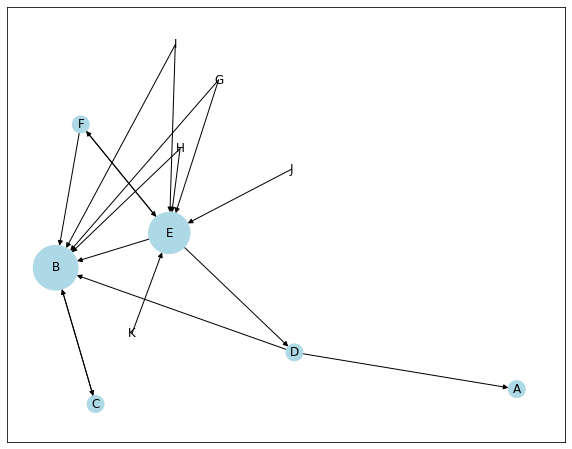

In [14]:
nodelist, node_size = node_sizer(G, mode='indegree')
draw_graph(G, pos, nodelist, node_size, node_color='lightblue')

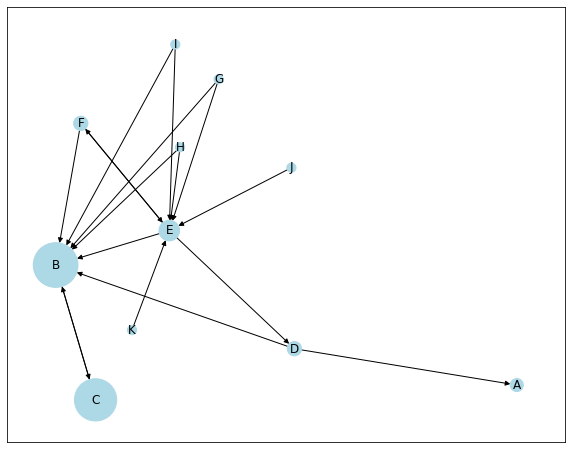

In [15]:
nodelist, node_size = node_sizer(G, mode='pagerank')
draw_graph(G, pos, nodelist, node_size, node_color='lightblue')

> Scientists have long known that the extinction of key species in a food web can cause collapse of the entire system, but the vast number of interactions between species makes it difficult to guess which animals and plants are the most important. Now, computational biologists have adapted the Google search algorithm, called PageRank, to the problem of predicting ecological collapse, and they’ve created a startlingly accurate model.

> "In PageRank, you're an important website if important websites point to you... We took that idea and reversed it: Species are important if they support important species."

![](images/foodweb.png)

Source: [mmnp201166p22.pdf](https://www.mmnp-journal.org/articles/mmnp/pdf/2011/06/mmnp201166p22.pdf)

In [16]:
df = pd.read_csv('data/food_web.csv')

G = nx.from_pandas_edgelist(
        df, 
        source='pred', 
        target='prey', 
        create_using=nx.DiGraph
)

In [17]:
RANDOM_SEED = 20 # 3, 8, 10, 13
np.random.seed(RANDOM_SEED)
pos = nx.spring_layout(G)

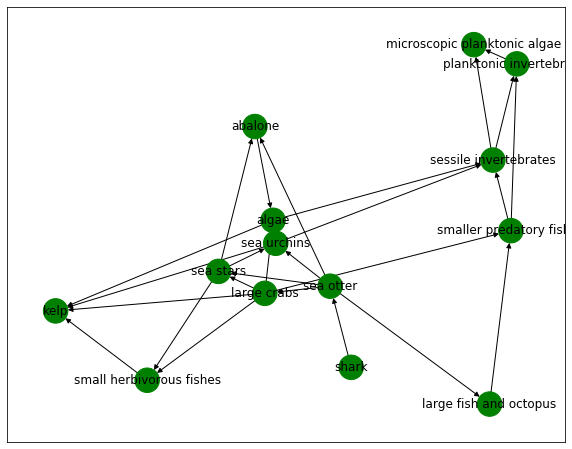

In [18]:
nodelist, node_size = node_sizer(G, max_node_size=600)
draw_graph(G, pos, nodelist, node_size)

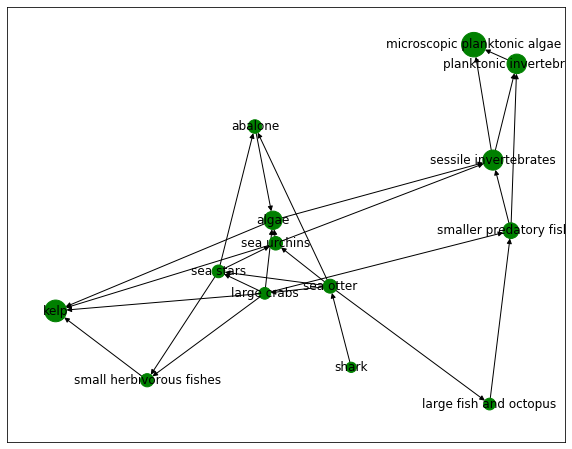

In [19]:
nodelist, node_size = node_sizer(G, mode='pagerank', max_node_size=600)
draw_graph(G, pos, nodelist, node_size)

In [20]:
pd.DataFrame.from_dict(dict(nx.pagerank(G)), orient='index').sort_values(0, ascending=False)

,0
microscopic planktonic algae,0.161608
kelp,0.126808
sessile invertebrates,0.108773
planktonic invertebrates,0.102534
algae,0.090520
smaller predatory fishes,0.066069
sea otter,0.052216
sea urchins,0.049401
abalone,0.049401
small herbivorous fishes,0.046832


> "Most conservationists are focused on a single species, and they just study that species. But you really have to take into account that this species is not independent, it’s really tangled in a network of multi-species interactions."

> For ecosystems on the brink of collapse, a network-based approach to conservation could make all the difference.